# Data Preparation

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

mainX = []
mainY = []

for i in range(20):
    # Generate random data
    x = np.linspace(20, 20, 20)
    y = np.random.rand(20) + x * np.random.rand(20)  # Linear pattern with noise
    
    mainX.extend(x)
    mainY.extend(y)


# Create a line plot
plt.figure(figsize=(10, 6))
#plt.plot(mainX, y, color='blue', marker='o', linestyle='-', linewidth=2, markersize=6, label='Random Linear Pattern')

# Customize plot elements
plt.title('Linear Random Custom Pattern')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


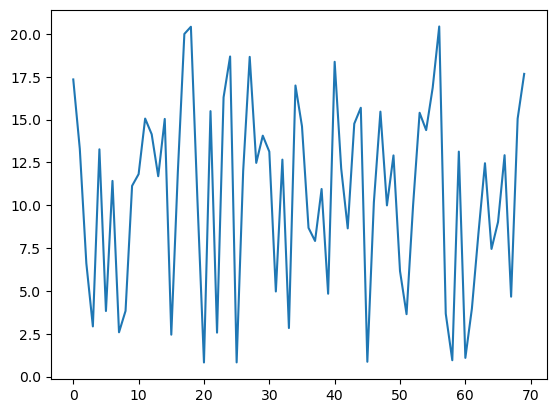

In [61]:
plt.plot(mainY[:70])

In [62]:
len(mainY)

400

---

# Data Seperation

In [63]:
XData = mainY[:393]
YData = mainY[7:]

In [64]:
len(XData), len(YData)

(393, 393)

In [65]:
def split(list_a, chunk_size):
    for i in range(0, len(list_a)-1, chunk_size):
        yield np.array(list_a[i:i + chunk_size]).astype(np.float32)

chunk_size = 7
XData = (list(split(XData, chunk_size)))
YData = (list(split(YData, chunk_size)))

In [66]:
len(XData),len(YData)

(56, 56)

In [67]:
YData.pop()
XData.pop()

array([13.955969 ,  9.840014 ,  7.795982 ,  4.0137315,  2.971019 ,
       16.424265 , 16.345509 ], dtype=float32)

In [68]:
YData = np.asarray(YData).astype(np.float32)
XData = np.asarray(XData).astype(np.float32)

## Model Building and Training
---

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from tensorflow import keras
import tensorflow as tf

from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler,ReduceLROnPlateau

from sklearn.model_selection import KFold,GroupKFold
from tensorflow.keras import layers

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
 XData, YData, test_size=0.33, random_state=42)

In [71]:
YData

array([[ 2.5805695 ,  3.8303173 , 11.128364  , 11.814087  , 15.055831  ,
        14.140588  , 11.690704  ],
       [15.035217  ,  2.4426737 , 11.9224    , 19.994892  , 20.415445  ,
        10.308282  ,  0.81932175],
       [15.489579  ,  2.5609658 , 16.293991  , 18.679573  ,  0.8237379 ,
        11.993714  , 18.657146  ],
       [12.470061  , 14.057403  , 13.12482   ,  4.9630027 , 12.659061  ,
         2.8294616 , 16.98607   ],
       [14.602298  ,  8.676418  ,  7.911753  , 10.945277  ,  4.831805  ,
        18.370037  , 12.136531  ],
       [ 8.646499  , 14.756029  , 15.686728  ,  0.8609653 , 10.170456  ,
        15.460404  ,  9.988398  ],
       [12.905328  ,  6.152447  ,  3.6382642 ,  9.988962  , 15.394426  ,
        14.381792  , 16.85863   ],
       [20.431149  ,  3.666542  ,  0.9494915 , 13.127065  ,  1.0877594 ,
         3.9682336 ,  8.352703  ],
       [12.449079  ,  7.4483547 ,  9.020371  , 12.91818   ,  4.660253  ,
        15.050695  , 17.663895  ],
       [ 3.6677618 ,  1.8788

In [72]:
def build_model():
    
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True), input_shape=(7, 1)))

    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)))
    
    model.add(tf.keras.layers.GRU(64, return_sequences=True, kernel_initializer='uniform'))
    model.add(tf.keras.layers.Dropout(0.2))
    
    model.add(tf.keras.layers.GRU(32, return_sequences=True, kernel_initializer='uniform'))
    model.add(tf.keras.layers.Dropout(0.2))


    model.add(tf.keras.layers.Flatten())
    
    model.add(tf.keras.layers.Dense(32, activation='relu'))
    model.add(tf.keras.layers.Dense(7))
    
    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'mae', metrics=['mse'])

    model.summary()
    
    return model

In [73]:
save_best = tf.keras.callbacks.ModelCheckpoint("Model.h5", monitor='val_loss',verbose=1, save_best_only=True)

In [74]:
model = build_model()
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=40, batch_size=128, verbose=1, callbacks=[save_best])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_22 (Bidirecti  (None, 7, 128)           33792     
 onal)                                                           
                                                                 
 bidirectional_23 (Bidirecti  (None, 7, 64)            41216     
 onal)                                                           
                                                                 
 gru_4 (GRU)                 (None, 7, 64)             24960     
                                                                 
 dropout_6 (Dropout)         (None, 7, 64)             0         
                                                                 
 gru_5 (GRU)                 (None, 7, 32)             9408      
                                                                 
 dropout_7 (Dropout)         (None, 7, 32)            

---

1/1 [==============================] - 0s 21ms/step


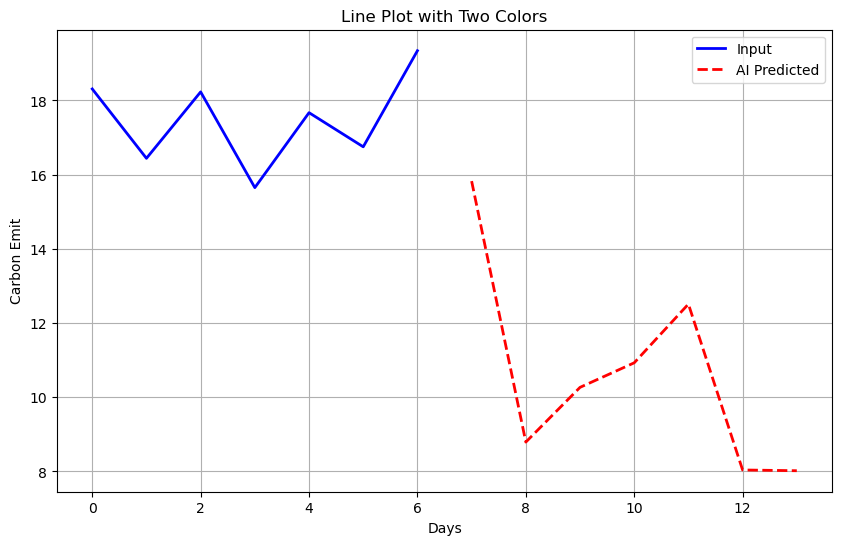

In [59]:
test = np.array([18.31,16.44,18.23,15.65,17.67,16.75,19.34]).astype(np.float32)
pred = model.predict(test.reshape(1,7))

graphPrediction = []
graphPrediction.extend(test)
graphPrediction.extend(pred.reshape(-1))

x = []
for i in range(14):
    x.append(i)

# Create a line plot with two colors
plt.figure(figsize=(10, 6))

# Plot the first segment of the line in blue
plt.plot(x[:7], graphPrediction[:7], color='blue', linestyle='-', linewidth=2, label='Input')

# Plot the second segment of the line in red
plt.plot(x[7:], graphPrediction[7:], color='red', linestyle='--', linewidth=2, label='AI Predicted')

# Customize plot elements
plt.title('Line Plot with Two Colors')
plt.xlabel('Days')
plt.ylabel('Carbon Emit')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


1/1 [==============================] - 0s 31ms/step


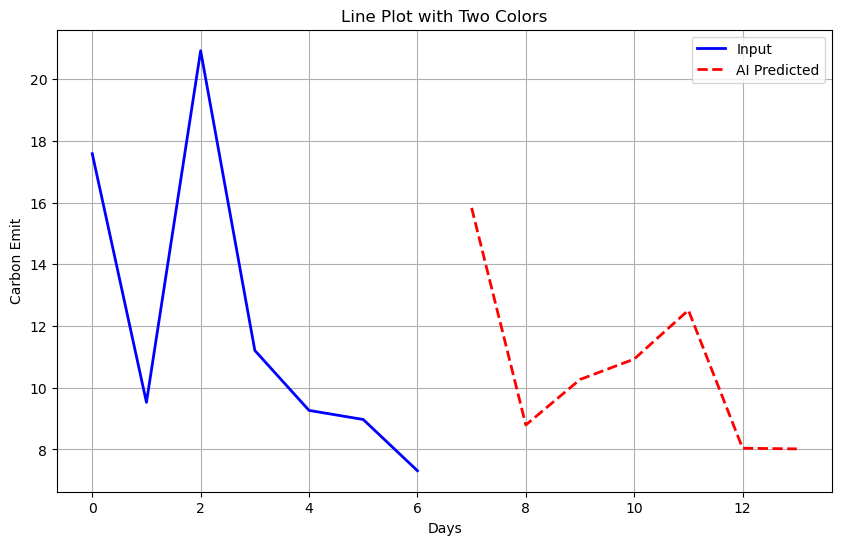

In [55]:
test = np.array([17.582363,  9.527162, 20.918768, 11.207062,  9.265643, 8.97169 ,
        7.311791]).astype(np.float32)
pred = model.predict(test.reshape(1,7))

graphPrediction = []
graphPrediction.extend(test)
graphPrediction.extend(pred.reshape(-1))

x = []
for i in range(14):
    x.append(i)

# Create a line plot with two colors
plt.figure(figsize=(10, 6))

# Plot the first segment of the line in blue
plt.plot(x[:7], graphPrediction[:7], color='blue', linestyle='-', linewidth=2, label='Input')

# Plot the second segment of the line in red
plt.plot(x[7:], graphPrediction[7:], color='red', linestyle='--', linewidth=2, label='AI Predicted')

# Customize plot elements
plt.title('Line Plot with Two Colors')
plt.xlabel('Days')
plt.ylabel('Carbon Emit')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


---

# Month Prediction Algorithm

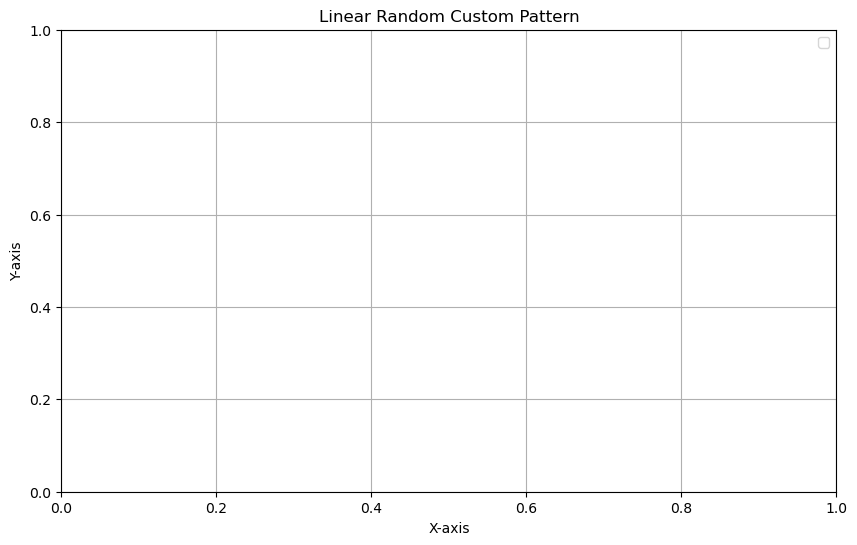

In [16]:
import matplotlib.pyplot as plt
import numpy as np

mainX = []
mainY = []

for i in range(100):
    # Generate random data
    x = np.linspace(20, 50, 50)
    y = np.random.rand(50) + x * np.random.rand(50)  # Linear pattern with noise
    
    mainX.extend(x)
    mainY.extend(y)


# Create a line plot
plt.figure(figsize=(10, 6))
#plt.plot(mainX, y, color='blue', marker='o', linestyle='-', linewidth=2, markersize=6, label='Random Linear Pattern')

# Customize plot elements
plt.title('Linear Random Custom Pattern')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


In [17]:
len(mainY)

5000

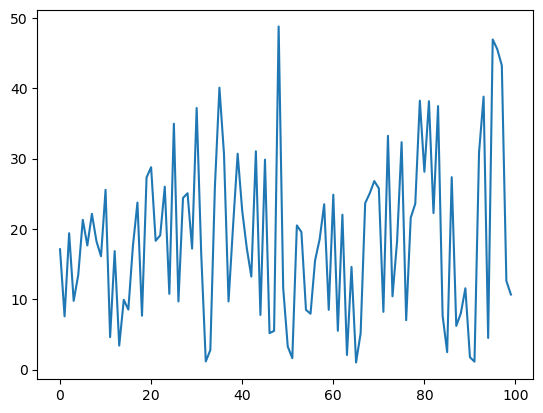

In [18]:
plt.plot(mainY[:100])

In [19]:
XData = mainY[:4970]
YData = mainY[30:]

In [20]:
len(XData), len(YData)

(4970, 4970)

In [21]:
def split(list_a, chunk_size):
    for i in range(0, len(list_a)-1, chunk_size):
        yield np.array(list_a[i:i + chunk_size]).astype(np.float32)

chunk_size = 30
XData = (list(split(XData, chunk_size)))
YData = (list(split(YData, chunk_size)))

In [22]:
YData.pop()
XData.pop()

array([15.3858595,  1.5091884, 16.767895 , 20.970259 , 12.405516 ,
        6.8139687,  4.3462043, 14.982436 ,  2.8390741,  2.283202 ,
       18.438557 ,  4.4184456, 11.576375 , 25.695673 ,  3.1050618,
       26.292295 , 19.34327  , 30.46266  ,  6.984598 ,  5.77318  ],
      dtype=float32)

In [23]:
YData = np.asarray(YData).astype(np.float32)
XData = np.asarray(XData).astype(np.float32)

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from tensorflow import keras
import tensorflow as tf

from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler,ReduceLROnPlateau

from sklearn.model_selection import KFold,GroupKFold
from tensorflow.keras import layers

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
 XData, YData, test_size=0.33, random_state=42)

In [26]:
def build_model():
    
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True), input_shape=(30, 1)))

    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)))
    model.add(tf.keras.layers.Dropout(0.25))

    model.add(tf.keras.layers.Flatten())
    
    model.add(tf.keras.layers.Dense(64, activation='relu', kernel_initializer='uniform'))
    model.add(tf.keras.layers.Dense(30))
    
    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'mae', metrics=['mse'])

    model.summary()
    
    return model

In [27]:
save_best = tf.keras.callbacks.ModelCheckpoint("monthModel.h5", monitor='val_loss',verbose=1, save_best_only=True)

In [28]:
model = build_model()
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, batch_size=64, verbose=1, callbacks=[save_best])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 30, 256)          133120    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 30, 128)          164352    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 30, 128)           0         
                                                                 
 flatten_1 (Flatten)         (None, 3840)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                245824    
                                                                 
 dense_3 (Dense)             (None, 30)               

---

1/1 [==============================] - 1s 1s/step


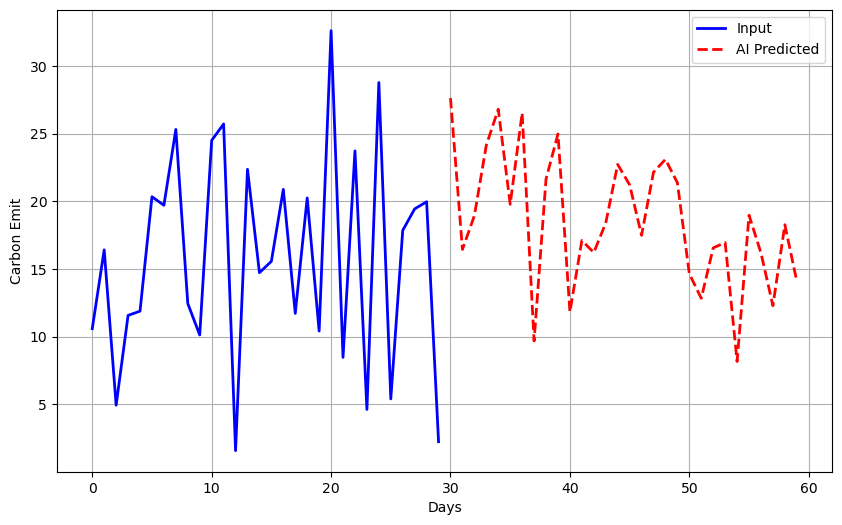

In [29]:
test = np.array([10.580897 , 16.407118 ,  4.9232693, 11.562812 , 11.876699 ,
       20.3376   , 19.706802 , 25.314161 , 12.438278 , 10.116097 ,
       24.502548 , 25.714218 ,  1.5572892, 22.36543  , 14.721957 ,
       15.5617   , 20.881203 , 11.710397 , 20.246723 , 10.40407  ,
       32.610992 ,  8.457507 , 23.724775 ,  4.6104083, 28.781645 ,
        5.388179 , 17.848938 , 19.437452 , 19.965925 ,  2.2242668]).astype(np.float32)

pred = model.predict(test.reshape(1,30))

graphPrediction = []
graphPrediction.extend(test)
graphPrediction.extend(pred.reshape(-1))

x = []
for i in range(60):
    x.append(i)

# Create a line plot with two colors
plt.figure(figsize=(10, 6))

# Plot the first segment of the line in blue
plt.plot(x[:30], graphPrediction[:30], color='blue', linestyle='-', linewidth=2, label='Input')

# Plot the second segment of the line in red
plt.plot(x[30:], graphPrediction[30:], color='red', linestyle='--', linewidth=2, label='AI Predicted')

# Customize plot elements
plt.xlabel('Days')
plt.ylabel('Carbon Emit')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


1/1 [==============================] - 0s 21ms/step


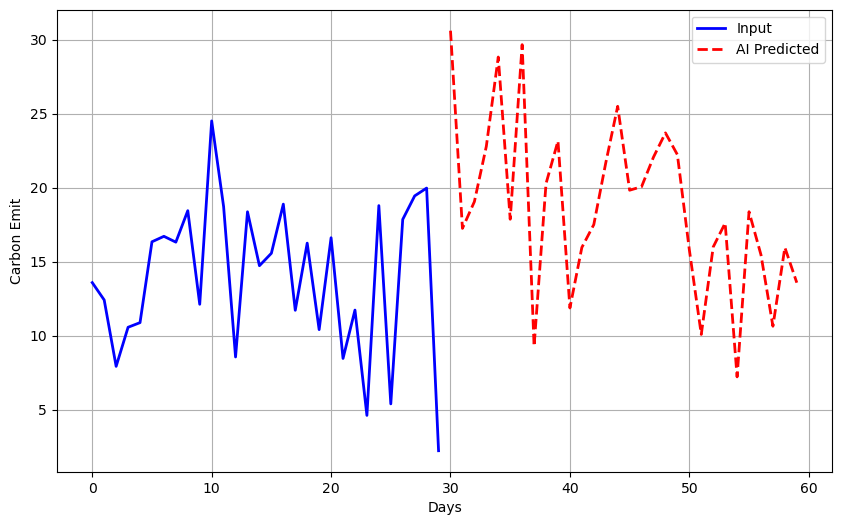

In [30]:
test = np.array([13.580897 , 12.407118 ,  7.9232693, 10.562812 , 10.876699 ,
       16.3376   , 16.706802 , 16.314161 , 18.438278 , 12.116097 ,
       24.502548 , 18.714218 ,  8.5572892, 18.36543  , 14.721957 ,
       15.5617   , 18.881203 , 11.710397 , 16.246723 , 10.40407  ,
       16.610992 ,  8.457507 , 11.724775 ,  4.6104083, 18.781645 ,
        5.388179 , 17.848938 , 19.437452 , 19.965925 ,  2.2242668]).astype(np.float32)

pred = model.predict(test.reshape(1,30))

graphPrediction = []
graphPrediction.extend(test)
graphPrediction.extend(pred.reshape(-1))

x = []
for i in range(60):
    x.append(i)

# Create a line plot with two colors
plt.figure(figsize=(10, 6))

# Plot the first segment of the line in blue
plt.plot(x[:30], graphPrediction[:30], color='blue', linestyle='-', linewidth=2, label='Input')

# Plot the second segment of the line in red
plt.plot(x[30:], graphPrediction[30:], color='red', linestyle='--', linewidth=2, label='AI Predicted')

# Customize plot elements
plt.xlabel('Days')
plt.ylabel('Carbon Emit')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


---